In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
% matplotlib inline

In [21]:
# Read in weather data 
weather_filename = 'fort_lauderdale.csv'
weather_file = open(weather_filename)
weather_data = weather_file.read()
weather_file.close()

In [22]:
# Break the weather data into lines 
lines = weather_data.split('\n')
print(len(lines))
for i in range(5):
    print(lines[i])

23790
COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,4,-99.99000,-99.90000,-99.90000, -99.90000


In [23]:
labels = lines[0]
values = lines[1:]
n_values = len(values)
print(labels)

COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP


In [24]:
# From single line to list of values
year = []
month = []
day = []
max_temp = []
j_year = 1
j_month = 2 
j_day = 3
j_max_temp = 5

In [25]:
for i_row in range(n_values):
    split_values = values[i_row].split(',')
    if len(split_values) >= j_max_temp:
        year.append(int(split_values[j_year]))
        month.append(int(split_values[j_month]))
        day.append(int(split_values[j_day]))
        max_temp.append(float(split_values[j_max_temp]))

In [26]:
# Making sure that our splitting pricess is ok
for i_day in range(100):
    print(max_temp[i_day])

-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
-99.9
80.0
82.0
83.0
83.0
85.0
85.0
70.0
75.0
75.0


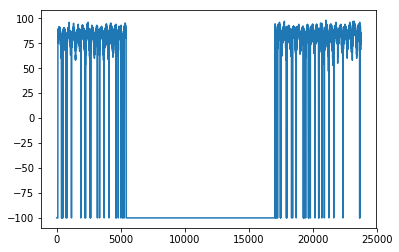

In [27]:
plt.plot(max_temp)

The temperature values fall roughly in between 50 and 100. Temperature falls to -99 in between at regular intervals which confirms our finding about the leap year temperatures. And in the middle we have a whole lot of data missing from 1966 to 1998 which we also indicated while data inspection. 

The next task is to exact the not NAN data. We have to be careful about some things particularly in this case. This is a time series data which means that the order in which rows are ordered is important. Also time gap between consecutive rows is important. From the max. temperature graph it can be seen that data is bundled in two regions and there is a huge gap in between. We can neglect the first bundle for the following reasons : 
* Since we have huge missing data in between we will not be able to capture the effect of bundle while prediction. 
* Not necessarily today's temperature depends on the temperature 50 years back. 

By visual inspection we see that mid of this data while lie on a missing value. 

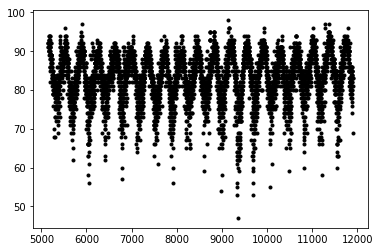

In [28]:
# Isolate recent data 
i_mid = len(max_temp) // 2 
temps = np.array(max_temp[i_mid:])
temps[np.where(temps == -99.9)] = np.nan # Substitute missing data with NAN value
plt.plot(temps,color='black',marker='.',linestyle='none')

Numpy handles NAN values very well. This is reflected in this plot which is much cleaner than the previous one. There are clear annual fluctuations in the max temperature which are due to winter and summer season. Also, if we zoom this plot we will observe that in fact that temperature values are whole numbers and not in decimal points as we had pointed out in data inspection. 

In [29]:
# Remove NANs from dataset
# Trim the array from the beginning so that it starts from a non NAN value
#print(np.where(np.isnan(temps))[0])
#print(np.where(np.logical_not(np.isnan(temps)))[0][0]) # location of first non-NAN item
t_start = np.where(np.logical_not(np.isnan(temps)))[0][0]
temps = temps[t_start:]
#print(np.where(np.isnan(temps))[0])
i_nans = np.where(np.isnan(temps))[0]
#print(np.diff(i_nans))

What should we do with the missing values in between? We can trim off the ones in the beginning and the end. Since we are working with a time series data we cannot just remove these NANs. The order and spacing between consecutive data is important. We we randomly remove values from between any phenomena which might depend on the time difference might break down. So we need to keep all of our observations. So using one method or another we have to make a reasonable guess about our missing values. 

Luckily for us we are working with weather! We know that the weather in a given week and season tends to be roughly the same. There aren't big changes and we can resonably assume that the high temperature tomorrow will be somewhere in the neighbourhood of the high temperature today. 

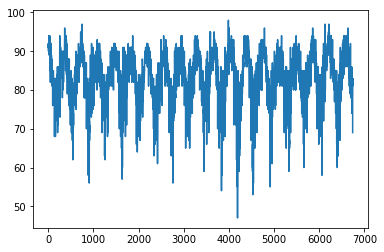

In [30]:
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i - 1]
        
plt.plot(temps)  

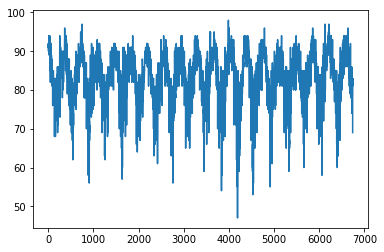

In [31]:
n_days = temps.size
days = np.arange(n_days)
plt.plot(days, temps)

## A brief introduction to correlation
Usually correleration is used to study the relation between two variables. A positive correlation implies that an increase in one variable leads to increase in the other variable as well. While a negative correltion implies otherwise. The correlation usually varies beween -1 and 1. Where r = 1 means very strong correlation and 0 means no correlation at all. The correlation of a variable with itslef is always one. 

Since here we have a time series data we can play much more with this concept. We define a term called autocorrelation. Let's say that temperature data over a particular time period is day T. In our case the temperatures are recorded at an interval of one day. Suppose we are interested in finding how is temperature today related to the temperature yesterday. This we can simply achieve by shifting our data by 1 and then calculating the correlation. Our experience days that there are not drastic changes in temperature and the temperature today will be similar to the one of yesterday. 

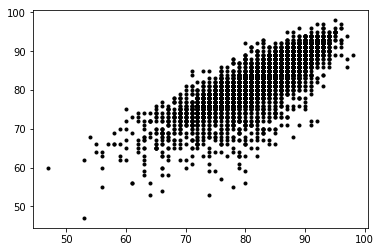

In [32]:
# Determine if previous day's temperature is related to that of the following day.
# We simply plot the data and we see a positive correlation which is expected. 
plt.plot(temps[:-1], temps[1:],color='black', marker='.',linestyle='none')

Since the temperatures were reported in whole numbers, we cannot make out from this plot if some points sit on top of each other. Adding a _jitter_ solves the problem. 

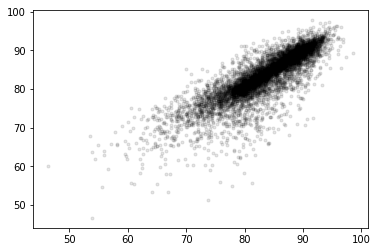

In [33]:
def scatter(x,y):
    """"
    Make a scatter plot with jitter.
    """
    x_jitter = x + np.random.normal(size=x.size, scale=0.5)
    y_jitter = y + np.random.normal(size=y.size, scale=0.5)
    plt.plot(
        x_jitter, y_jitter,
        color='black',
        marker='.',
        linestyle='none',
        alpha=0.1
    )
scatter(temps[:-1], temps[1:])

In the plot above we can easily make that there is a positive correlatiob between today's temperature and that of yerterday's. 
In fact we can do this for an arbitary amount of shift. Let's day that we want to know how the temperature today is to the temperature 1 month back or even 1 year back. All this can be easily studied with the help of autocorrelation curves. 

0.7594840373515716


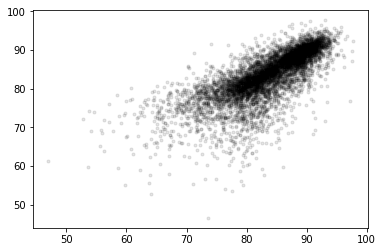

In [36]:
# Plot and correlation between temperatures with a gap of two days. 
shift = 2
scatter(temps[:-shift], temps[shift:])
print(np.corrcoef(temps[:-shift], temps[shift:])[1,0])

We can iterate over the value of shifts to see that the further back in time we reach, the less closely are temperatures related to today's. 

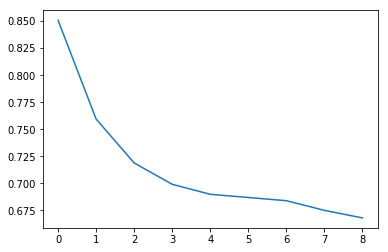

In [38]:
autocorr = []
for shift in range(1,10):
    correlation = (np.corrcoef(temps[:-shift], temps[shift:])[1,0])
    autocorr.append(correlation)
plt.plot(autocorr)    

We can see here that as we increase the day gap the correlation decreases. It tends to be highest for the smallest value of shift. In simple terms it means that the temperature today is more likely to be closer to yesterday's temperature than to the temperature 10 days ago. 

As a bit of a tangent this also is a result that the world changes gradually more often than not or smoothly. Mathematically it can be described as soomthness or the rates of change tend to be small especially when it involves movement of masses like atmosphere or seawater. Rate changes tend to be limited by the amount of energy available. Except in cases of high energy events like hurricanes or tectonic plate movements or a nuclear detonation!, big things change pretty slowly. 

To see how temperature over the last theree years is correlated with each other, we can simply increase the value of shift in our previous code to stdudy it.

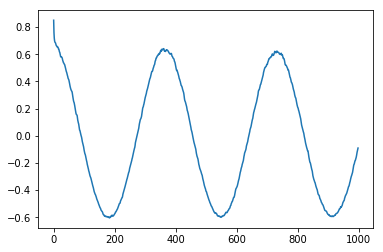

In [39]:
autocorr = []
for shift in range(1,1000):
    correlation = (np.corrcoef(temps[:-shift], temps[shift:])[1,0])
    autocorr.append(correlation)
plt.plot(autocorr) 

There is a clear periodic pattern with a period of one year. Which makes sense because year to year June temperatures more related to each other than to the temperatures in the winter months. This means that today's temperature is highly correlated with the temperature one year ago or two years ago etc. 

Interestingly it is negatively correlated with the temperature six months ago (around 180 mark). If temperature six months ago was very low, it was probably winters, which makes today summer which manifests itself as an inverse relationship (negative correlation) in the graph. If we zoom in this plot we will see that it is not smooth and day to day differences in correlation may not be repeated. But the yearly period wins over the non-smooth daily character of the plot. 
 
In summary we can say that the annual trends swamp everything else. They are the strongest component of the temperature pattern. That makes the annual trend as a  prime candidate for extraction as a first feature of our model. 

In [41]:
day_of_year = np.zeros(temps.size)

def find_day_of_year(year, month, day):
    """
    Convert year, month, and date to day of the year 
    
    Parameters 
    ----------
    year : int 
    month : int 
    day : int 
    
    Returns
    -------
    day_of_year : int 
    """
    days_per_month = np.array([
        31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31
    ])
    # For leap years 
    if year % 4 == 0:
        days_per_month[1] += 1
        
    day_of_year = np.sum(np.array(days_per_month[:month - 1])) + day - 1
    return day_of_year


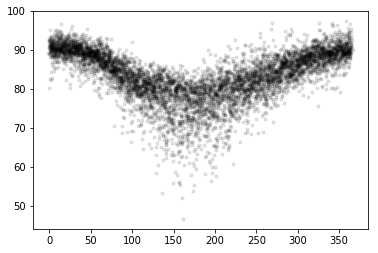

In [45]:
# Create 10-day medians for each day of the year. 
for i_row in range(temps.size):
    day_of_year[i_row] = find_day_of_year(
    year[i_row], month[i_row], day[i_row])

scatter(day_of_year, temps)


In [47]:
median_temp_calender = np.zeros(366) # to account even for leap year
ten_day_medians = np.zeros(temps.size)
for i_day in range(0,365):
    low_day = i_day - 5 
    high_day = i_day + 4
    if low_day < 0:
        low_day += 365
    if high_day > 365:
        high_day += -365
    if low_day < high_day:
        i_window_days = np.where(np.logical_and(day_of_year >= low_day, day_of_year <= high_day))
    else:
        i_window_days = np.where(np.logical_or(day_of_year <= low_day, day_of_year >= high_day))
        
        
    ten_day_median = np.median(temps[i_window_days])
    median_temp_calender[i_day] = ten_day_median
    ten_day_medians[np.where(day_of_year == i_day)] = ten_day_median 
    
    if i_day == 364:
        ten_day_medians[np.where(day_of_year == 365)] = ten_day_median
        median_temp_calender[365] = ten_day_median

print(ten_day_medians.size, np.unique(ten_day_medians), ten_day_medians)

6739 [76.  76.5 77.  77.5 78.  78.5 79.  79.5 80.  80.5 81.  82.  82.5 83.
 84.  84.5 85.  85.5 86.  87.  87.5 88.  88.5 89.  90.  90.5 91. ] [84. 84. 84. ... 78. 78. 79.]


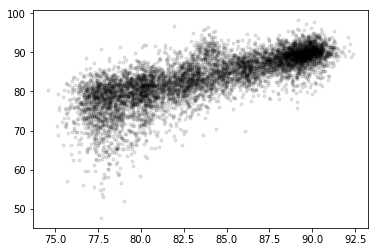

In [48]:
scatter(ten_day_medians, temps)